#  Encoding-Technique/Label Encoder/One Hot Encoding/Ordinal Encoding


In [1]:
import pandas as pd
import numpy as np


# Importing the file

In [2]:
df=pd.read_csv('agora.csv')
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


# Null value Check/ Null means missing not mean zero

In [3]:
df.isnull().sum()

Marketing Spend    0
Administration     0
Transport          1
Area               0
Profit             0
dtype: int64

# Handling null value using central Tendency(Mean,Median,Mode)

In [4]:
df.Transport.mean()
fill=df.Transport.mean()
df.Transport=df.Transport.fillna(fill)
df.isnull().sum()       #Check null value

Marketing Spend    0
Administration     0
Transport          0
Area               0
Profit             0
dtype: int64

# For showing Histrogram

<AxesSubplot:xlabel='Area', ylabel='Count'>

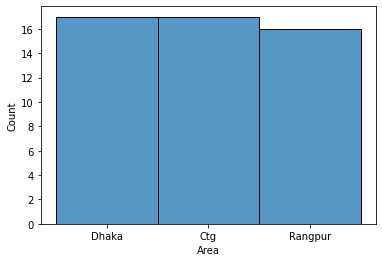

In [5]:
#import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df.Area)

# Encoding without any Technique

In [6]:
df.Area.unique()

array(['Dhaka', 'Ctg', 'Rangpur'], dtype=object)

In [7]:
df.Area=df.Area.replace(['Dhaka','Ctg','Rangpur'],[3,2,1])  # Replace area value with 3,2,1

In [8]:
df.Area
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,3,192261.83
1,162597.70,151377.59,443898.53,2,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,3,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


# Label-Encoder

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [10]:
df.Area=le.fit_transform(df['Area'])
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,1,191792.06
2,153441.51,101145.55,407934.54,0,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,0,166187.94


# Label Encoder if it has 2/3 columns in dataframe we can use for loop  (it is only applicable to label Encoder)

In [11]:
df=pd.read_csv('agora.csv')
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [12]:
for column in df.columns:
    if df[column].dtype==np.number:
        continue
    df[column]=le.fit_transform(df[column])

<ipython-input-12-fdfaa4ee93d5>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:


In [13]:
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


# One Hot Encoding

In [14]:
df=pd.read_csv('agora.csv')
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [15]:
dummy=pd.get_dummies(df.Area,drop_first=True)

In [16]:
dummy.head()

,Dhaka,Rangpur
0,1,0
1,0,0
2,0,1
3,1,0
4,0,1


In [17]:
df=df.drop('Area',axis=1)

In [18]:
df=pd.concat([df,dummy],axis=1)

In [19]:
df.head()

,Marketing Spend,Administration,Transport,Profit,Dhaka,Rangpur
0,114523.61,136897.80,471784.10,192261.83,1,0
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0
4,142107.34,91391.77,366168.42,166187.94,0,1


# Ordinal Encoding

In [20]:
df=pd.read_csv('agora.csv')
df.head()
df.Area.unique()

array(['Dhaka', 'Ctg', 'Rangpur'], dtype=object)

In [21]:
city=['Dhaka','Ctg','Rangpur']
from sklearn.preprocessing import OrdinalEncoder

In [22]:
oe=OrdinalEncoder(categories=[city])

In [23]:
encoded=oe.fit_transform(df[['Area']])

In [24]:
#encoded.head()
new_area=pd.DataFrame(encoded,columns=['Area'])
new_area.head()

,Area
0,0.0
1,1.0
2,2.0
3,0.0
4,2.0


In [25]:
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [26]:
df=df.drop('Area',axis=1)

In [27]:
df.head()

,Marketing Spend,Administration,Transport,Profit
0,114523.61,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


# Doing Concate dataset with encoding(ordinal) 1st method own

In [28]:
df=pd.concat([df,new_area],axis=1)

In [29]:
df.head()

,Marketing Spend,Administration,Transport,Profit,Area
0,114523.61,136897.80,471784.10,192261.83,0.0
1,162597.70,151377.59,443898.53,191792.06,1.0
2,153441.51,101145.55,407934.54,191050.39,2.0
3,144372.41,118671.85,383199.62,182901.99,0.0
4,142107.34,91391.77,366168.42,166187.94,2.0


# Doing Concate dataset with encoding(ordinal) 2nd method Rashed vai

In [30]:
df.Area=new_area

In [31]:
df.head()

,Marketing Spend,Administration,Transport,Profit,Area
0,114523.61,136897.80,471784.10,192261.83,0.0
1,162597.70,151377.59,443898.53,191792.06,1.0
2,153441.51,101145.55,407934.54,191050.39,2.0
3,144372.41,118671.85,383199.62,182901.99,0.0
4,142107.34,91391.77,366168.42,166187.94,2.0


# Hasing /Hash Encoding

In [35]:
#pip install category_encoders
import category_encoders as ce
df=pd.read_csv('agora.csv')
df.head()
df.Area.unique()

array(['Dhaka', 'Ctg', 'Rangpur'], dtype=object)

In [37]:
encoder=ce.HashingEncoder(cols='Area',n_components=3) # n_components is the number of unique
                                                      # value of particular column

In [39]:
df=encoder.fit_transform(df)
df.head()

C:\Users\Ramen\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,col_0,col_1,col_2,Marketing Spend,Administration,Transport,Profit
0,0,1,0,114523.61,136897.80,471784.10,192261.83
1,0,0,1,162597.70,151377.59,443898.53,191792.06
2,1,0,0,153441.51,101145.55,407934.54,191050.39
3,0,1,0,144372.41,118671.85,383199.62,182901.99
4,1,0,0,142107.34,91391.77,366168.42,166187.94
